IMPORT PYTHON MODULES 

READ THE DATASET INTO A DATAFRAME 

In [1]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# here, i will be reading in the train.csv file for the wrangling and EDA.
# the test data shouldnt be touched until during the testing of the models. 
df = pd.read_csv("train.csv")
df.head(4) # displaying the first 4 lines of the dataset

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Pooh's Heffalump Movie,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,11-Feb-05,68 min,24-May-05,...,NaN,NaN,NaN,6.4/10,80%,64/100,0,0,1,High
1,Yeh Jawaani Hai Deewani,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,31-May-13,160 min,15-Jul-13,...,124.0,127528.0,12.0,7.1/10,67%,0,0,22,92,Low
2,Tae Guk Gi: The Brotherhood of War,South Korea,"Action, Drama, War",Korean,4.0,False,R,24-Sep-04,140 min,15-Feb-05,...,614.0,351123.0,18.0,8.1/10,80%,64/100,0,12,7,Low
3,"Book of Eli, The",USA,"Action, Adventure, Drama, Thriller",English,1.0,False,R,15-Jan-10,118 min,15-Jun-10,...,NaN,NaN,NaN,6.9/10,47%,53/100,0,3,16,High


## performing data wrangling  

In [3]:
df.shape #checking the number of rows and columns in the dataset

(2400, 22)

In [4]:
# checking that the column names corresponds with the row description on the case study pdf file
df.columns

Index(['title', 'country', 'genres', 'language', 'writer_count',
       'title_adaption', 'censor_rating', 'release_date', 'runtime',
       'dvd_release_date', 'users_votes', 'comments', 'likes', 'overall_views',
       'dislikes', 'ratings_imdb', 'ratings_tomatoes', 'ratings_metacritic',
       'special_award', 'awards_win', 'awards_nomination', 'revenue_category'],
      dtype='object')

In [5]:
#checking the data types of each of the columns
df.dtypes

title                  object
country                object
genres                 object
language               object
writer_count          float64
title_adaption           bool
censor_rating          object
release_date           object
runtime                object
dvd_release_date       object
users_votes            object
comments              float64
likes                 float64
overall_views         float64
dislikes              float64
ratings_imdb           object
ratings_tomatoes       object
ratings_metacritic     object
special_award           int64
awards_win              int64
awards_nomination       int64
revenue_category       object
dtype: object

from the above result, it will be noticed that release_date and dvd_release_date are not in datetime format

so I will be converting them to datetime format 

In [6]:
def convert_to_dtypes(data):
    data.release_date = pd.to_datetime(data["release_date"])
    data.dvd_release_date = pd.to_datetime(data["dvd_release_date"])
    data.runtime = data.runtime.str.extract('(\d+)') # picking just the numerical part of each entry
    data.runtime = data.runtime.astype(float) # converting the result to float
    data.users_votes = data.users_votes.replace({',':''},regex=True).apply(pd.to_numeric,1)
    data.ratings_imdb = data.ratings_imdb.apply(eval)
    data.ratings_tomatoes = data.ratings_tomatoes.str.extract('(\d+)')
    data.ratings_tomatoes = data.ratings_tomatoes.astype(float)
    data.ratings_metacritic = data.ratings_metacritic.str.extract('(\d+)')
    data.ratings_metacritic = data.ratings_metacritic.astype(float)

In [7]:
df["release_date"] = pd.to_datetime(df["release_date"])
df.dvd_release_date = pd.to_datetime(df["dvd_release_date"])
#confirming that the columns have been changed to the date format
df.dtypes

title                         object
country                       object
genres                        object
language                      object
writer_count                 float64
title_adaption                  bool
censor_rating                 object
release_date          datetime64[ns]
runtime                       object
dvd_release_date      datetime64[ns]
users_votes                   object
comments                     float64
likes                        float64
overall_views                float64
dislikes                     float64
ratings_imdb                  object
ratings_tomatoes              object
ratings_metacritic            object
special_award                  int64
awards_win                     int64
awards_nomination              int64
revenue_category              object
dtype: object

In [8]:
# i have also noticed that the runtime and users_votes were also Objects instead of a floats. 
# we will convert this to just numbers

df.runtime = df.runtime.str.extract('(\d+)') # picking just the numerical part of each entry
df.runtime = df.runtime.astype(float) # converting the result to float
df.users_votes = df.users_votes.replace({',':''},regex=True).apply(pd.to_numeric,1) # removing the commas in the enteries


In [9]:
df.ratings_imdb = df.ratings_imdb.apply(eval)
df.ratings_tomatoes = df.ratings_tomatoes.str.extract('(\d+)')
df.ratings_tomatoes = df.ratings_tomatoes.astype(float)
df.ratings_metacritic = df.ratings_metacritic.str.extract('(\d+)')
df.ratings_metacritic = df.ratings_metacritic.astype(float)

In [10]:
df.dtypes # confriming that the entire rows are nowin the appropriate data types. 

title                         object
country                       object
genres                        object
language                      object
writer_count                 float64
title_adaption                  bool
censor_rating                 object
release_date          datetime64[ns]
runtime                      float64
dvd_release_date      datetime64[ns]
users_votes                    int64
comments                     float64
likes                        float64
overall_views                float64
dislikes                     float64
ratings_imdb                 float64
ratings_tomatoes             float64
ratings_metacritic           float64
special_award                  int64
awards_win                     int64
awards_nomination              int64
revenue_category              object
dtype: object

## EXPLORATORY DATA ANALYSIS

CHECKING FOR MISSING DATA AND FIXING THE MISSING DATA ISSUES

In [11]:
df.isna().sum()

title                   2
country                 0
genres                  0
language                0
writer_count           94
title_adaption          0
censor_rating          38
release_date            4
runtime                 0
dvd_release_date       69
users_votes             0
comments              426
likes                 444
overall_views         317
dislikes              444
ratings_imdb            0
ratings_tomatoes        0
ratings_metacritic      0
special_award           0
awards_win              0
awards_nomination       0
revenue_category        0
dtype: int64

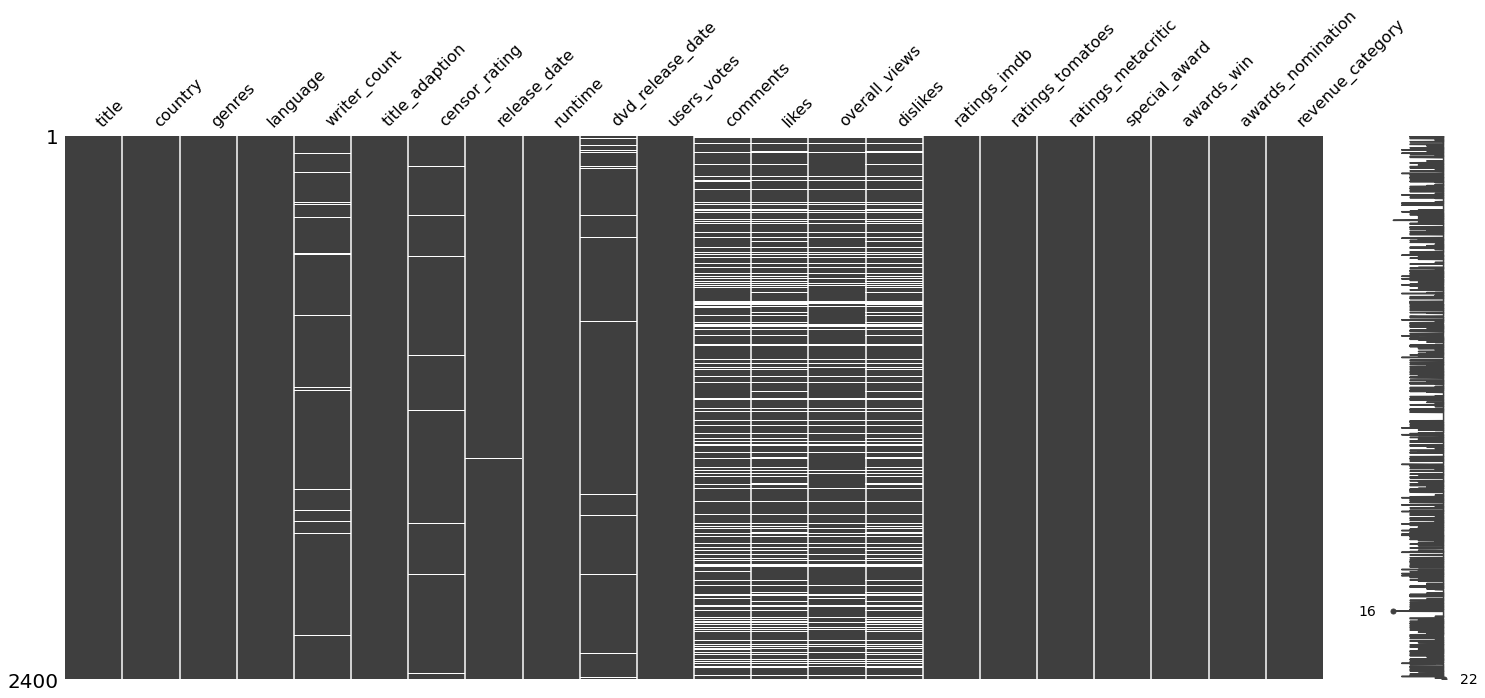

In [12]:
import missingno as msno
msno.matrix(df);

### from the above result, we noticed that there are null values in the dataset, so as best practice, i will be filling the null values with the mean values of the column where applicable. And delete the other columns 

In [13]:
#replcing the missing values with the mean of the column
df = df.fillna(df.mean())

C:\Users\USER\AppData\Local\Temp\ipykernel_10176\1619979698.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
C:\Users\USER\AppData\Local\Temp\ipykernel_10176\1619979698.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [14]:
df.isnull().sum() # confirming the reminants of the null values. 

title                  2
country                0
genres                 0
language               0
writer_count           0
title_adaption         0
censor_rating         38
release_date           4
runtime                0
dvd_release_date      69
users_votes            0
comments               0
likes                  0
overall_views          0
dislikes               0
ratings_imdb           0
ratings_tomatoes       0
ratings_metacritic     0
special_award          0
awards_win             0
awards_nomination      0
revenue_category       0
dtype: int64

In [15]:
# dropping the remaining columns
df.dropna(inplace=True)

<AxesSubplot:>

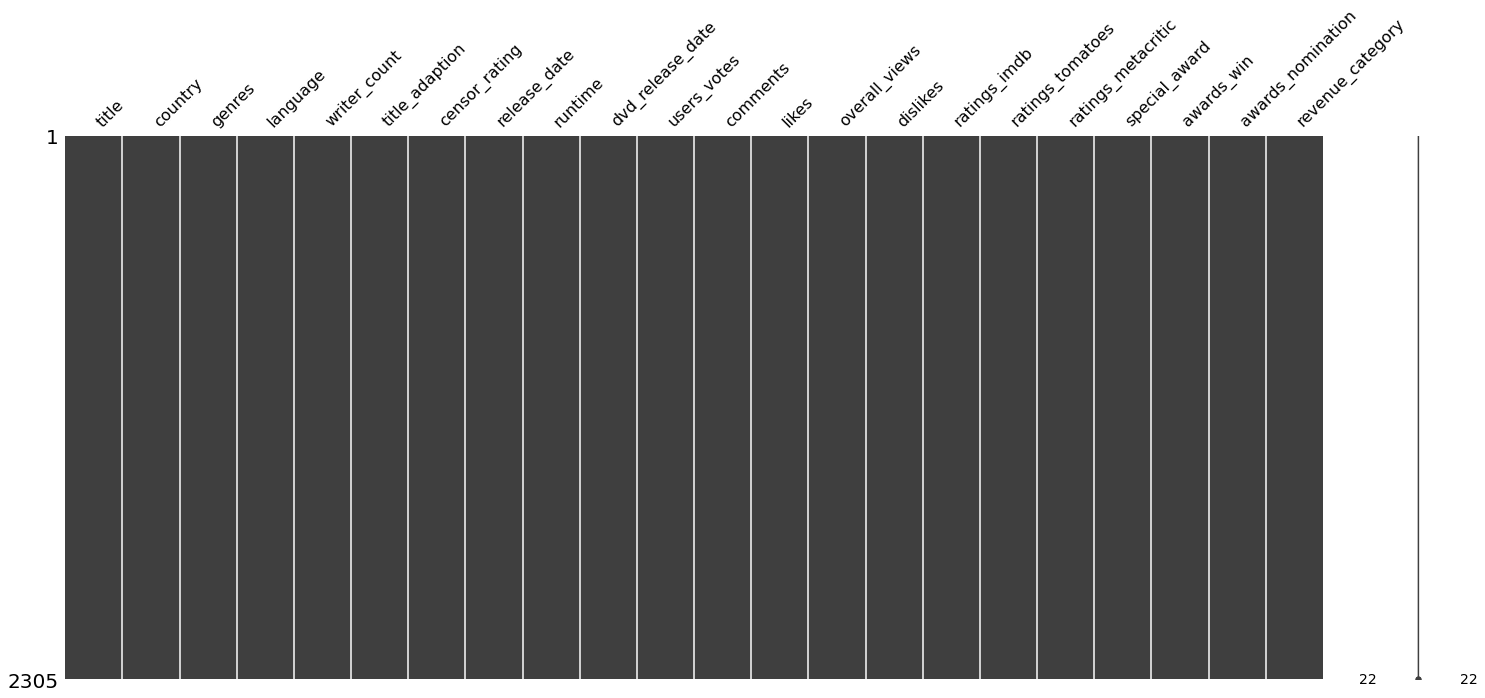

In [16]:
msno.matrix(df) #visiualizing the clean dataset

In [17]:
df.isnull().sum() # confirming that we have a clean dataset now. 

title                 0
country               0
genres                0
language              0
writer_count          0
title_adaption        0
censor_rating         0
release_date          0
runtime               0
dvd_release_date      0
users_votes           0
comments              0
likes                 0
overall_views         0
dislikes              0
ratings_imdb          0
ratings_tomatoes      0
ratings_metacritic    0
special_award         0
awards_win            0
awards_nomination     0
revenue_category      0
dtype: int64

In [18]:
# checking for the shape of the remaing data. 
df.shape

(2305, 22)

 UNDERSTANDING THE DATASET BY LOOKING AT THE STATISTICS OF THE DATA, CHECKING FOR OUTLIERS AND DROPPING DUPLICATES IF ANY.

In [19]:
df.describe()

,writer_count,runtime,users_votes,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination
count,2305.000000,2305.000000,2.305000e+03,2305.000000,2305.000000,2.305000e+03,2305.000000,2305.000000,2305.000000,2305.000000,2305.000000,2305.000000,2305.000000
mean,2.609749,105.917570,8.584680e+04,551.475204,3152.005558,1.359451e+06,231.640013,0.649879,56.773536,54.164425,0.191323,6.751844,13.023861
std,1.990570,20.678763,1.507295e+05,1927.002897,9358.446603,3.800294e+06,853.591160,0.098897,28.043259,20.408211,0.393428,16.379347,25.329099
min,1.000000,38.000000,1.120000e+02,0.000000,0.000000,3.180000e+02,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,93.000000,7.869000e+03,17.000000,146.000000,8.855500e+04,11.000000,0.590000,34.000000,42.000000,0.000000,0.000000,1.000000
50%,2.000000,102.000000,3.086300e+04,118.000000,781.000000,4.171540e+05,57.000000,0.660000,62.000000,56.000000,0.000000,2.000000,5.000000
75%,3.000000,115.000000,9.585600e+04,546.438197,3113.894172,1.345472e+06,232.665644,0.720000,82.000000,69.000000,0.000000,6.000000,13.000000
max,28.000000,566.000000,2.070977e+06,44644.000000,188526.000000,1.071502e+08,29267.000000,0.900000,100.000000,100.000000,1.000000,235.000000,326.000000


there are significant outliers in the dataset, looking at the disparity between the mean, 3rd quartile(75&)

and the max values. However given the circumstance, this can be understood as being normal in this regards.

In [20]:
df.duplicated().sum() #checking for duplicated values 

0

checking for the correlation 

before checking for correlation, we neeed to encode the revenue_category column. 

here, i will be using label encoding

In [21]:
new_df = pd.get_dummies(df["revenue_category"])
df.revenue_category = new_df.High # high = 1, low = 0 

In [22]:
df.head(3)

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Pooh's Heffalump Movie,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,2005-02-11,68.0,2005-05-24,...,3113.894172,1.345472e+06,232.665644,0.64,80.0,64.0,0,0,1,1
1,Yeh Jawaani Hai Deewani,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,2013-05-31,160.0,2013-07-15,...,124.000000,1.275280e+05,12.000000,0.71,67.0,0.0,0,22,92,0
2,Tae Guk Gi: The Brotherhood of War,South Korea,"Action, Drama, War",Korean,4.0,False,R,2004-09-24,140.0,2005-02-15,...,614.000000,3.511230e+05,18.000000,0.81,80.0,64.0,0,12,7,0


In [23]:
df.corr()

,writer_count,title_adaption,runtime,users_votes,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
writer_count,1.000000,0.450247,0.003614,0.127235,0.060651,0.059864,0.053218,0.051507,-0.042900,-0.057880,-0.046182,0.059112,0.002866,0.032459,0.163977
title_adaption,0.450247,1.000000,0.158486,0.156662,0.075746,0.098724,0.093610,0.077257,-0.016134,-0.055807,-0.033536,0.112747,0.058664,0.108972,0.171907
runtime,0.003614,0.158486,1.000000,0.285131,0.082242,0.096460,0.077186,0.048707,0.289312,0.138346,0.128185,0.226966,0.257117,0.296268,0.066639
users_votes,0.127235,0.156662,0.285131,1.000000,0.226642,0.236101,0.207153,0.109556,0.322965,0.177690,0.213865,0.389993,0.502670,0.576420,0.406228
comments,0.060651,0.075746,0.082242,0.226642,1.000000,0.847751,0.664376,0.485889,0.023774,-0.003397,0.007358,0.101107,0.056960,0.124479,0.134660
likes,0.059864,0.098724,0.096460,0.236101,0.847751,1.000000,0.757912,0.580668,0.041323,0.011813,0.008009,0.126267,0.071339,0.142300,0.135116
overall_views,0.053218,0.093610,0.077186,0.207153,0.664376,0.757912,1.000000,0.885009,0.019666,-0.012620,0.001460,0.127628,0.063003,0.121136,0.151861
dislikes,0.051507,0.077257,0.048707,0.109556,0.485889,0.580668,0.885009,1.000000,-0.050736,-0.036160,-0.035336,0.087562,0.040635,0.064872,0.093851
ratings_imdb,-0.042900,-0.016134,0.289312,0.322965,0.023774,0.041323,0.019666,-0.050736,1.000000,0.733895,0.613406,0.386223,0.375594,0.372806,-0.144338
ratings_tomatoes,-0.057880,-0.055807,0.138346,0.177690,-0.003397,0.011813,-0.012620,-0.036160,0.733895,1.000000,0.798729,0.375132,0.356272,0.366723,-0.244633


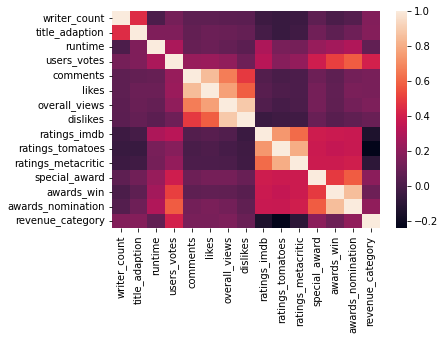

In [24]:

sns.heatmap(df.corr());

In [25]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\USER\AppData\Local\Temp\ipykernel_10176\2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,writer_count,title_adaption,runtime,users_votes,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
writer_count,1.00,0.45,0.00,0.13,0.06,0.06,0.05,0.05,-0.04,-0.06,-0.05,0.06,0.00,0.03,0.16
title_adaption,0.45,1.00,0.16,0.16,0.08,0.10,0.09,0.08,-0.02,-0.06,-0.03,0.11,0.06,0.11,0.17
runtime,0.00,0.16,1.00,0.29,0.08,0.10,0.08,0.05,0.29,0.14,0.13,0.23,0.26,0.30,0.07
users_votes,0.13,0.16,0.29,1.00,0.23,0.24,0.21,0.11,0.32,0.18,0.21,0.39,0.50,0.58,0.41
comments,0.06,0.08,0.08,0.23,1.00,0.85,0.66,0.49,0.02,-0.00,0.01,0.10,0.06,0.12,0.13
likes,0.06,0.10,0.10,0.24,0.85,1.00,0.76,0.58,0.04,0.01,0.01,0.13,0.07,0.14,0.14
overall_views,0.05,0.09,0.08,0.21,0.66,0.76,1.00,0.89,0.02,-0.01,0.00,0.13,0.06,0.12,0.15
dislikes,0.05,0.08,0.05,0.11,0.49,0.58,0.89,1.00,-0.05,-0.04,-0.04,0.09,0.04,0.06,0.09
ratings_imdb,-0.04,-0.02,0.29,0.32,0.02,0.04,0.02,-0.05,1.00,0.73,0.61,0.39,0.38,0.37,-0.14
ratings_tomatoes,-0.06,-0.06,0.14,0.18,-0.00,0.01,-0.01,-0.04,0.73,1.00,0.80,0.38,0.36,0.37,-0.24


from the correlation heatmap above, it would be seen that features like ratings_imdb, ratings_tomatoes, and ratings_metacritic all have a negative correlation with the revenue_category. however, all other features have a positive correlation, with users_votes having the highest correlation with the revenue_category

In [26]:
# since the users_vote has the highest correlation with the revenue, i will be making use of this for the comparism
df.groupby("genres")["users_votes"].mean()


genres
Action                                                         10244.333333
Action, Adventure                                             147462.000000
Action, Adventure, Biography, Drama, History, Romance, War    154507.000000
Action, Adventure, Biography, Drama, History, Thriller        108765.000000
Action, Adventure, Biography, Drama, War                       95242.000000
                                                                  ...      
Romance, Comedy, Drama, Music                                   7934.000000
Romance, Thriller                                              14534.500000
Sci-Fi, Thriller                                               71286.000000
Thriller                                                        5189.500000
Thriller, Western                                               7869.000000
Name: users_votes, Length: 573, dtype: float64

# model building
## since we are dealing with a classification problemm, i will be building the models on 

> RANDOM FOREST 

> KNN

> LOGISTIC REGRESSION

> XGB CLASSIFIER

> SVC

> GUASSIAN CLASSIFIER

In [27]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# The function below will be used to evaluate different metrics of the algorithms used here.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))

### i made use of recall, precision and f1 score so as to compare these metrics to the accuracy to be sure that my results werent biased in any way.

In [28]:
#setting up training and validation sets 
X = df.drop(["revenue_category", 'title', 'genres', "country", "language", "censor_rating", "release_date", "dvd_release_date"], axis=1)
y = df.revenue_category

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

In [29]:
#logistic_model <- logistic_model
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)
 
# Predict on validation set
lr_pred = model1.predict(X_val)

# evaluate on validation set
evaluate_model(y_val, lr_pred)


Accuracy Score:  0.5574837310195228
Precision Score:  0.5458715596330275
Recall Score:  0.9754098360655737
F1 Score:  0.7000000000000001


In [30]:
# random forest model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on validation set
rfc_pred = rfc.predict(X_val)

evaluate_model(y_val, rfc_pred)


Accuracy Score:  0.8590021691973969
Precision Score:  0.8653061224489796
Recall Score:  0.8688524590163934
F1 Score:  0.8670756646216768


In [31]:
# xgboost models
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                    learning_rate = 0.1,
                    max_depth =4,
                    n_estimators = 500,
                    subsample = 1.0)

eval_set = [(X_val, y_val)]

xgb1.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='logloss', eval_set=eval_set, verbose=True)

#predict on validation set
xgb1_pred = xgb1.predict(X_val)
evaluate_model(y_val, xgb1_pred)

[0]	validation_0-logloss:0.64628
[1]	validation_0-logloss:0.60874
[2]	validation_0-logloss:0.57856
[3]	validation_0-logloss:0.55334
[4]	validation_0-logloss:0.52950
[5]	validation_0-logloss:0.51049
[6]	validation_0-logloss:0.49605
[7]	validation_0-logloss:0.48124
[8]	validation_0-logloss:0.46750
[9]	validation_0-logloss:0.45581
[10]	validation_0-logloss:0.44511
[11]	validation_0-logloss:0.43799
[12]	validation_0-logloss:0.43035
[13]	validation_0-logloss:0.42271
[14]	validation_0-logloss:0.41688
[15]	validation_0-logloss:0.41201
[16]	validation_0-logloss:0.40769
[17]	validation_0-logloss:0.40350
[18]	validation_0-logloss:0.39866
[19]	validation_0-logloss:0.39604


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-logloss:0.39335
[21]	validation_0-logloss:0.39294
[22]	validation_0-logloss:0.38953
[23]	validation_0-logloss:0.38959
[24]	validation_0-logloss:0.38800
[25]	validation_0-logloss:0.38729
[26]	validation_0-logloss:0.38543
[27]	validation_0-logloss:0.38549
[28]	validation_0-logloss:0.38489
[29]	validation_0-logloss:0.38394
[30]	validation_0-logloss:0.38201
[31]	validation_0-logloss:0.38171
[32]	validation_0-logloss:0.38042
[33]	validation_0-logloss:0.37949
[34]	validation_0-logloss:0.37869
[35]	validation_0-logloss:0.37840
[36]	validation_0-logloss:0.37680
[37]	validation_0-logloss:0.37587
[38]	validation_0-logloss:0.37563
[39]	validation_0-logloss:0.37622
[40]	validation_0-logloss:0.37575
[41]	validation_0-logloss:0.37447
[42]	validation_0-logloss:0.37438
[43]	validation_0-logloss:0.37415
[44]	validation_0-logloss:0.37413
[45]	validation_0-logloss:0.37492
[46]	validation_0-logloss:0.37531
[47]	validation_0-logloss:0.37387
[48]	validation_0-logloss:0.37430
[49]	validatio

In [32]:
#KNN model

knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_val)

evaluate_model(y_val, knnpred)

Accuracy Score:  0.7613882863340564
Precision Score:  0.7768595041322314
Recall Score:  0.7704918032786885
F1 Score:  0.7736625514403294


In [33]:
# SVC MODEL 
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_val)

evaluate_model(y_val, svcpred)

Accuracy Score:  0.6030368763557483
Precision Score:  0.6205533596837944
Recall Score:  0.6434426229508197
F1 Score:  0.6317907444668008


In [34]:
# guassian model 

gaussiannb= GaussianNB()
gaussiannb.fit(X_train, np.ravel(y_train,order='C'))
gaussiannbpred = gaussiannb.predict(X_val)

evaluate_model(y_val, gaussiannbpred)

Accuracy Score:  0.6247288503253796
Precision Score:  0.865979381443299
Recall Score:  0.3442622950819672
F1 Score:  0.4926686217008798


## FROM THE ABOVE RESULTS AND EVALUATIONS, XGBCLASSIFIER AND RANDOM FOREST HAS THE BEST PERFORMANCE. SO THEN, I WILL BE USING THE BEST PERFORMANCE
## WHICH IS XGBCLASSIFIER ON THE TEST SET.

In [35]:
# lets read in the test file
test = pd.read_csv("test.csv")
convert_to_dtypes(test)
test.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination
0,Delhi-6,India,"Comedy, Drama","Hindi, English",3.0,True,Not Rated,2009-02-20,141.0,2009-06-16,...,7.0,43.0,165008.0,13.0,0.60,40.0,45.0,0,2,7
1,Before I Disappear,"USA, UK",Drama,English,1.0,False,Unrated,2014-11-28,93.0,2015-05-19,...,NaN,NaN,NaN,NaN,0.72,38.0,47.0,0,16,8
2,"Good Year, A","USA, UK","Comedy, Drama, Romance","English, French, Russian",2.0,True,PG-13,2006-11-10,117.0,2007-02-27,...,14.0,276.0,187788.0,17.0,0.70,25.0,47.0,0,1,2
3,Brüno,"USA, UK",Comedy,"English, German",9.0,True,R,2009-07-10,81.0,2009-11-17,...,81.0,301.0,200324.0,43.0,0.58,67.0,54.0,0,2,5
4,How to Lose a Guy in 10 Days,"USA, Germany","Comedy, Romance",English,5.0,True,PG-13,2003-02-07,116.0,2003-07-01,...,74.0,480.0,740345.0,23.0,0.64,42.0,45.0,0,1,8


In [36]:
train_col = X_train.columns #selecting the test columns so that it matches with the train columns

In [37]:
X_test = test[train_col] # the columns for the test

In [38]:
X_test.shape # confirming that the test matches with the training set

(600, 14)

In [39]:
# predicting the test set with the xgboost model

xgb1_predicton = xgb1.predict(X_test)
xgb1_predicton

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,

In [40]:
# creating a new revenue_category in the test set and setting the it to the prediction result
test["revenue_category"] = xgb1_predicton.copy()
test.head(3)

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Delhi-6,India,"Comedy, Drama","Hindi, English",3.0,True,Not Rated,2009-02-20,141.0,2009-06-16,...,43.0,165008.0,13.0,0.60,40.0,45.0,0,2,7,0
1,Before I Disappear,"USA, UK",Drama,English,1.0,False,Unrated,2014-11-28,93.0,2015-05-19,...,NaN,NaN,NaN,0.72,38.0,47.0,0,16,8,0
2,"Good Year, A","USA, UK","Comedy, Drama, Romance","English, French, Russian",2.0,True,PG-13,2006-11-10,117.0,2007-02-27,...,276.0,187788.0,17.0,0.70,25.0,47.0,0,1,2,1


In [41]:
# i will now interpolate the values in revenue_category to match the original dataset
test.revenue_category.replace([1, 0], ["High", "Low"], inplace=True)
test.head(4) # verifying that the interpolation worked.

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Delhi-6,India,"Comedy, Drama","Hindi, English",3.0,True,Not Rated,2009-02-20,141.0,2009-06-16,...,43.0,165008.0,13.0,0.60,40.0,45.0,0,2,7,Low
1,Before I Disappear,"USA, UK",Drama,English,1.0,False,Unrated,2014-11-28,93.0,2015-05-19,...,NaN,NaN,NaN,0.72,38.0,47.0,0,16,8,Low
2,"Good Year, A","USA, UK","Comedy, Drama, Romance","English, French, Russian",2.0,True,PG-13,2006-11-10,117.0,2007-02-27,...,276.0,187788.0,17.0,0.70,25.0,47.0,0,1,2,High
3,Brüno,"USA, UK",Comedy,"English, German",9.0,True,R,2009-07-10,81.0,2009-11-17,...,301.0,200324.0,43.0,0.58,67.0,54.0,0,2,5,High


### arranging the dataframe to fit the submission criteria

In [42]:
# i will be selecting just just the "title" and "revenue_category" columns

submission = test[["title", "revenue_category"]]
submission

,title,revenue_category
0,Delhi-6,Low
1,Before I Disappear,Low
2,"Good Year, A",High
3,Brüno,High
4,How to Lose a Guy in 10 Days,High
...,...,...
595,Around the Bend,Low
596,"Black Power Mixtape 1967-1975, The",Low
597,"Matrix Revolutions, The",High
598,Who Killed the Electric Car?,Low


i will be saving the subimmision in a csv file named submission.csv

In [43]:
submission.to_csv("sample_submission.csv", sep=",", index=False )